In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from scipy import signal
import numpy as np

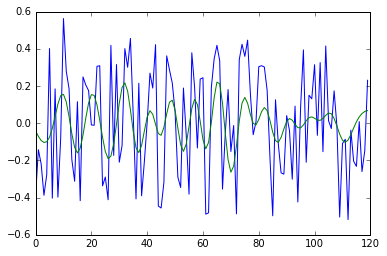

In [5]:
# filtering using FIR filter (finite impulse response) truncated in time
sg = np.random.rand(120)
sg = signal.detrend(sg) # linear detrend remove the dc component
plot(sg)
fir = signal.firwin(101, [0.10, 0.25], pass_zero=False)
y = signal.convolve(sg, fir, 'same') # first must be the larger array
plot(y)
figure()
#plot(fir)
# TODO remember how to do fft convolution

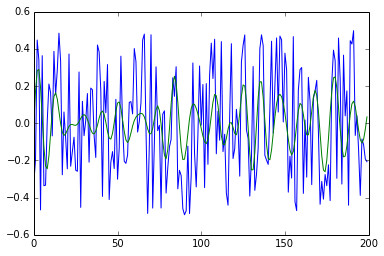

In [7]:
# filtering using a IIR (infinite impulse response) recursive filter
sg = np.random.rand(200)
sg = signal.detrend(sg) # linear detrend remove the dc component
plot(sg)
b, a = signal.butter(8, (0.10, 0.25), btype='bandpass')
#b, a = signal.butter(8, 0.125)
sy = signal.filtfilt(b, a, sg)
plot(sy)

sample rate and nyquist 0.0005 1000.0


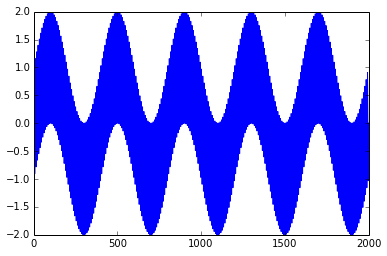

In [8]:
#First we create a one second signal that is the sum of two pure sine
#waves, with frequencies 5 Hz and 250 Hz, sampled at 2000 Hz.
t = np.linspace(0, 1.0, 2001)
xlow = np.sin(2 * np.pi * 5 * t)
xhigh = np.sin(2 * np.pi * 250 * t)
x = xlow + xhigh
plot(x)
dt = 1./2000 
fn = 1./(2*dt)
print "sample rate and nyquist", dt, fn

9.10861790128e-06


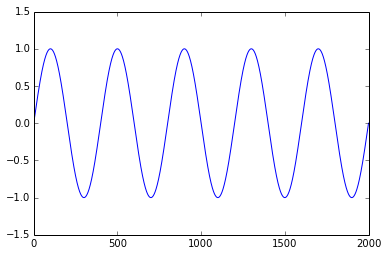

In [9]:
#Now create a lowpass Butterworth filter with a cutoff of 0.125 times
#the Nyquist rate, or 125 Hz, and apply it to x with filtfilt.  The
#result should be approximately xlow, with no phase shift.
from scipy import signal
b, a = signal.butter(8, 0.125)
y = signal.filtfilt(b, a, x, padlen=150)
print np.abs(y - xlow).max()
plot(y)

(-1.5, 1.5)

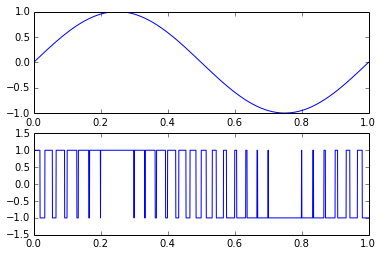

In [10]:
#A pulse-width modulated sine wave:
sig = np.sin(2 * np.pi * t)
pwm = signal.square(2 * np.pi * 30 * t, duty=(sig + 1)/2)
plt.subplot(2, 1, 1)
plt.plot(t, sig)
plt.subplot(2, 1, 2)
plt.plot(t, pwm)
plt.ylim(-1.5, 1.5)

Resample the random signal considering it has a constante sample rate

assumes it is periodic and uses fourier to ressample it

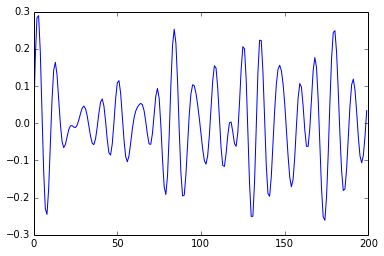

In [11]:
plot(sy)

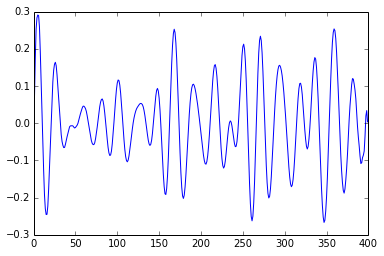

In [16]:
from scipy import signal

plot(signal.resample(sy, len(sy)*2))